# Book Crossings Data Set
Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the **Book-Crossing** community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore") # Turn off warnings
plt.style.use("seaborn-white") # Use seaborn-style plots
plt.rcParams.update({"font.size": 15}) # Set larger default plot font size
%matplotlib inline

In [2]:
ratings = pd.read_csv("./data/BX-Book-Ratings.csv", sep=";",
                         encoding="ISO-8859-1")

books = pd.read_csv("./data/BX-Books.csv", sep=";",
                       encoding="ISO-8859-1", error_bad_lines=False)

users = pd.read_csv("./data/BX-Users.csv", sep=";",
                         encoding="ISO-8859-1")

b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [3]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
print("Users: {} \nBooks: {}\nRatings: {}".format(len(users), len(books), len(ratings)))

Users: 278858 
Books: 271371
Ratings: 1149780


Cleaning column names so they are easier to work with:

In [7]:
users.columns = users.columns.str.lower().str.replace('-', '_')
books.columns = books.columns.str.lower().str.replace('-', '_')
ratings.columns = ratings.columns.str.lower().str.replace('-', '_')

# Users Data
We will start with `users_df`, a data frame that describes users of the Book Crossing community by location and age.

## Age

In [8]:
users.dtypes

user_id       int64
location     object
age         float64
dtype: object

In [9]:
sorted(users.age.unique())

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


In [10]:
len(users.age.unique())

166

There are 166 ages with a max age of 244 and a minimum age of 0. While I can hope that we have reached a point where infants or that our life expectancy is perennial, these ages are likely erroneous.

In [11]:
users_clean = users.loc[(users.age > 10) & (users.age < 100) | (pd.isnull(users.age))]

In [12]:
users_clean.age.unique()

array([nan, 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 35., 13., 58., 49., 38., 45., 62.,
       63., 27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59.,
       48., 72., 56., 67., 80., 52., 69., 71., 73., 78., 64., 12., 74.,
       75., 76., 83., 68., 11., 77., 70., 93., 81., 96., 84., 82., 90.,
       91., 94., 85., 97., 86., 92., 87., 95., 89., 99., 88., 98.])

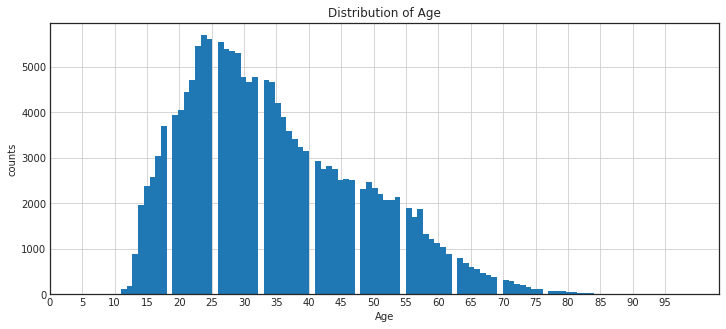

In [13]:
# First create a histogram of the Age field
ax = users_clean.age.hist(bins=100, figsize=(12,5))
ax.set_title("Distribution of Age")
ax.set_xlabel("Age")
ax.set_ylabel("counts")
ax.set_xticks(range(0,100,5))
plt.show()

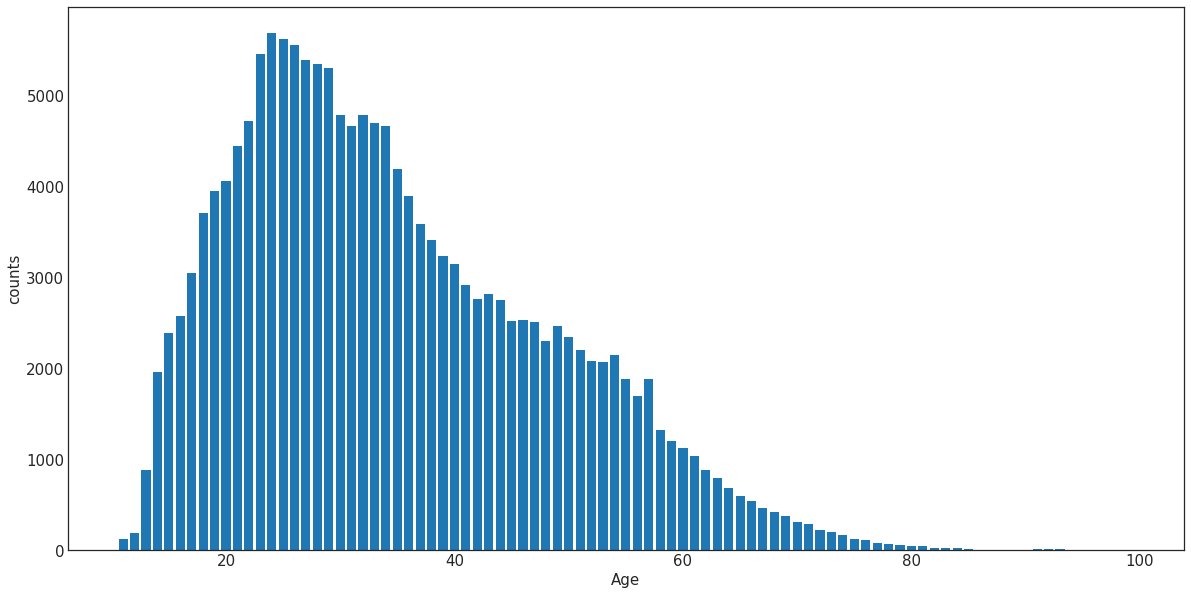

In [14]:
u = users_clean.age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 15}) # Set larger plot font size
plt.bar(u.index, u.values)
plt.xlabel("Age")
plt.ylabel("counts")
plt.show()

Age looks better after removing unrealistic values. How many users in the data set lack an age?

In [15]:
age_null = users_clean.age.isnull().sum() # Sums up the 1's returned by the isnull() mask
all_users = users_clean.user_id.count() # Counts the number of cells in the series - excludes NaNs!
print("There are {} empty age values in our set of {} users (or {}%).".format(age_null, all_users, round((age_null/all_users)*100, 2)))

There are 110762 empty age values in our set of 277332 users (or 39.94%).


We will impute the age for missing values with the mean of age. A more sophisticated imputation can be used, such as K-nearest-neighbors (KNN).

In [16]:
users_clean = users_clean.assign(age = users_clean.age.fillna(users_clean.age.mean()))

In [17]:
users_clean.head()

,user_id,location,age
0,1,"nyc, new york, usa",34.786876
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.786876
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.786876


In [18]:
age_null = users_clean.age.isnull().sum() # Sums up the 1's returned by the isnull() mask
all_users = users_clean.user_id.count() # Counts the number of cells in the series - excludes NaNs!
print("There are {} empty age values in our set of {} users (or {}%).".format(age_null, all_users, round((age_null/all_users)*100, 2)))

There are 0 empty age values in our set of 277332 users (or 0.0%).


## Location
Now we will split `location` by city, state, and country.

In [19]:
split_location = users_clean.location.str.split(",", expand=True)
split_location[split_location.iloc[:, 0:3].notnull()].head(10)

,0,1,2,3,4,5,6,7,8
0,nyc,new york,usa,NaN,NaN,NaN,NaN,NaN,NaN
1,stockton,california,usa,NaN,NaN,NaN,NaN,NaN,NaN
2,moscow,yukon territory,russia,NaN,NaN,NaN,NaN,NaN,NaN
3,porto,v.n.gaia,portugal,NaN,NaN,NaN,NaN,NaN,NaN
4,farnborough,hants,united kingdom,NaN,NaN,NaN,NaN,NaN,NaN
5,santa monica,california,usa,NaN,NaN,NaN,NaN,NaN,NaN
6,washington,dc,usa,NaN,NaN,NaN,NaN,NaN,NaN
7,timmins,ontario,canada,NaN,NaN,NaN,NaN,NaN,NaN
8,germantown,tennessee,usa,NaN,NaN,NaN,NaN,NaN,NaN
9,albacete,wisconsin,spain,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
split_location[split_location.iloc[:, 3].notnull()].shape

(1493, 9)

The first three splits are city, state, and country. However, there are 1493 users who had values in the fourth column. We will use the majority location criteria and drop these users, since only a small portion of the data set is inconsistent.

In [21]:
new_locations = split_location.rename(columns={0:"city", 1:"state", 2:"country"}).iloc[:, 0:3]

In [22]:
users_clean = pd.concat([users_clean, new_locations], axis=1).drop("location", axis=1)

In [23]:
users_clean.head()

,user_id,age,city,state,country
0,1,34.786876,nyc,new york,usa
1,2,18.000000,stockton,california,usa
2,3,34.786876,moscow,yukon territory,russia
3,4,17.000000,porto,v.n.gaia,portugal
4,5,34.786876,farnborough,hants,united kingdom


Let's explore the `city`, `state`, `country`.

In [24]:
users_clean.city.value_counts().head(10)

london       4074
barcelona    2644
toronto      2332
madrid       1923
sydney       1861
portland     1861
melbourne    1846
vancouver    1693
chicago      1560
seattle      1531
Name: city, dtype: int64

In [25]:
users_clean.state.value_counts().head(10)

 california      19798
 n/a             12420
 england         10608
 ontario          8706
 texas            8356
 new york         7839
 florida          6995
 pennsylvania     6075
 illinois         5848
 washington       5794
Name: state, dtype: int64

In [26]:
users_clean.country.value_counts().head(10)

 usa               138587
 canada             21471
 united kingdom     18165
 germany            16914
 spain              13010
 australia          11616
 italy              11187
                     4574
 france              3420
 portugal            3274
Name: country, dtype: int64

There is an empty string in the top 10 countries. We should flag these for treatment:

In [27]:
users_clean[(users_clean.country == "") | (users_clean.country == "")].shape

(4574, 5)

In [28]:
users_clean.country.replace("", np.nan, inplace=True)

In [29]:
print("There are {} country entries that are empty.".format(users_clean.country.isnull().sum()))

There are 4576 country entries that are empty.


There are no null values for `user_id`.

In [30]:
users_clean.user_id.isnull().sum()

0

# Books Data

In [32]:
books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

Dropping image columns:

In [31]:
books.drop(columns=["image_url_s", "image_url_m", "image_url_l"], inplace=True)

Converting years of publication to integer:

In [33]:
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors="coerce")

In [34]:
# replacing all years of publication that are 0 with NaN
books.year_of_publication.replace(0, np.nan, inplace=True)

In [35]:
# counting number of books with year of publication as null
books.year_of_publication.isnull().sum().sum()

4622

In [36]:
sorted(books["year_of_publication"].unique())

[1920.0,
 1941.0,
 1942.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1956.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 nan,
 1376.0,
 1378.0,
 1806.0,
 1897.0,
 1900.0,
 1901.0,
 1902.0,
 1904.0,
 1906.0,
 1908.0,
 1909.0,
 1910.0,
 1911.0,
 1914.0,
 1917.0,
 1919.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1955.0,
 1957.0,
 2005.0,
 2006.0,
 2008.0,
 2010.0,
 2011.0,
 2012.0,
 2020.0,
 2021.0,
 2024.0,
 202

In [37]:
# books with publication dates beyond 2018 seem to be erroneous. Also books with NaN publication dates could cause and issue.
books = books[books.year_of_publication < 2018] 

In [ ]:
# correcting publisher names and assigning the name 'Other' to those with missing publisher names
books.publisher = books.publisher.str.replace("&amp;", "&", regex=False)

In [39]:
books.publisher.isnull().sum().sum()

2

In [41]:
books.publisher.replace(np.nan, "Other", inplace=True)

In [42]:
books.publisher.isnull().sum().sum()

0

In [43]:
# checking if any publishers have been left blank
books[books.publisher == ""].publisher.count()

0

In [44]:
# checking if any ISBNs are null
books.isbn.isnull().sum().sum()

0

In [45]:
# checking if any ISBNs have been left blank
books[books.isbn == ""].isbn.count()

0

In [46]:
# checking if any authors are null
books.book_author.isnull().sum().sum()

1

In [47]:
# checking if any authors are blank
books[books.book_author == ""].book_author.count()

0

In [48]:
# replacing the NaN in for book_author with Unknown
books.book_author.replace(np.nan, "Unknown", inplace=True)

In [49]:
# checking if any titles are null
books.book_title.isnull().sum().sum()

0

In [50]:
# checking if any titles are blank
books[books.book_title == ""].book_title.count()

0

# Ratings Data

In [51]:
ratings.dtypes

user_id         int64
isbn           object
book_rating     int64
dtype: object

In [ ]:
# checking counts of nulls and missing values in each column
ratings.user_id.isnull().sum().sum()

In [ ]:
ratings.isbn.isnull().sum().sum()

In [ ]:
ratings.book_rating.isnull().sum().sum()

In [ ]:
# number of ratings before
len(ratings)

In [ ]:
# removing the rows with an implicit book_rating of 0
ratings = ratings[ratings.book_rating!=0]

In [ ]:
# number of explicit ratings
len(ratings)

In [ ]:
ratings.book_rating.value_counts().sort_index()

In [ ]:
#distribution of ratings
rtg = ratings.book_rating.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({"font.size": 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.show()